**TASK 1 - PREDICTION USING SUPERVISED ML**

**By - Guna . M**

In the given task,we've to predict the percentage of the student based on the no. of study hours. This is a simple linear regression as only two variables are involved.


# Importing the necessary libraries required

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Importing the data set

In [65]:
df = pd.read_csv("/content/drive/MyDrive/spark foundation intern/Task - 1/student_scores - student_scores.csv")

# Exploring the data using some pandas functions

In [66]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [67]:
df.shape

(25, 2)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [69]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

**Box plot** -  For outlier detection

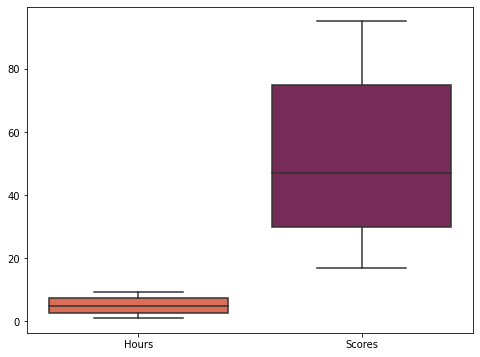

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df,palette='rocket_r')
plt.show()

There is no outliers in given dataset.

**Plotting Distribution plot**

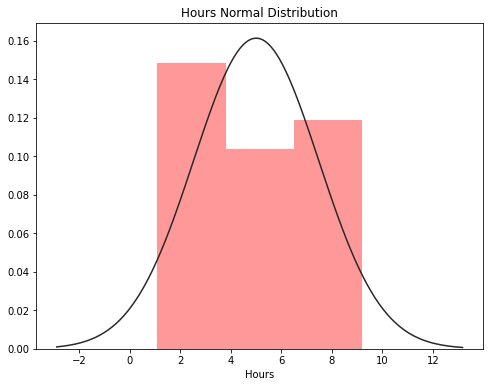

In [71]:
from scipy.stats import norm

plt.figure(figsize=(8, 6))
sns.distplot(df['Hours'],fit = norm,color = 'r', kde=False)
plt.title("Hours Normal Distribution")
plt.show()

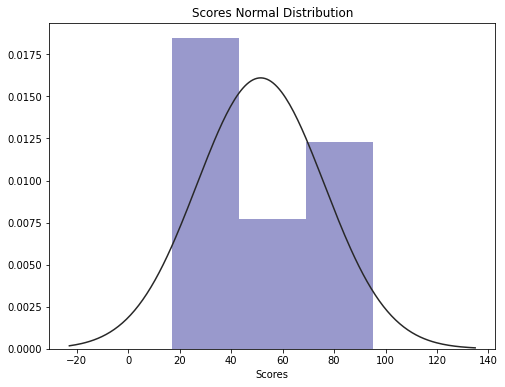

In [72]:
plt.figure(figsize=(8, 6))
sns.distplot(df['Scores'],fit = norm,color = 'navy', kde=False)
plt.title("Scores Normal Distribution")
plt.show()

**Plotting a graph of our data so that it will give us a clear idea about the data.**

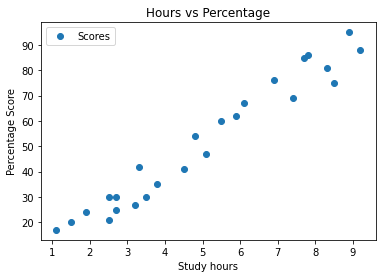

In [73]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Study hours')
plt.ylabel('Percentage Score')
plt.show()

Clearly, there is a positive linear relation between the data.

# Data Preparation

In [74]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

# Machine Learning

Now, splitting the data set into training set and testing set. 70% of the dataset is for training the model, rest of the dataset will be used to test the model.

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print("Training complete")

Training complete


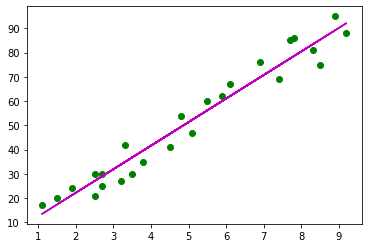

In [77]:
m = reg.coef_
c = reg.intercept_
graphLine = m*x+c
plt.scatter(x,y,color = 'g')
plt.plot(x,graphLine,color = 'm')
plt.show()

In [78]:
y_pred = reg.predict(x_test)

In [79]:
actual_predicted = pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


Predict the score of a student who studies 9.25 hours per day

In [86]:
student_hours=9.25
student_score=reg.predict([[student_hours]])
print("No of Hours = {}".format(student_hours))
print("Predicted Score = {}".format(student_score))

No of Hours = 9.25
Predicted Score = [92.61670034]


**#plotting the regression line and Test data**

In [81]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


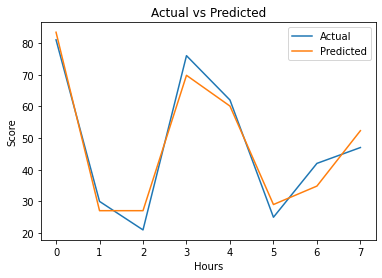

In [82]:
plt.plot(df)
plt.ylabel('Score')
plt.xlabel('Hours')
plt.legend(df)
plt.title('Actual vs Predicted')
plt.show()

# Model Evaluation

In [83]:
print('R-squared value for the trained model is:')
reg.score(x_train, y_train)

R-squared value for the trained model is:


0.9536486503889446

R-squared - R-squared is a statistical measure of how close the data are to the fitted regression line. In general, the higher the R-squared, the better the model fits your data.

Here, R-squared value is 0.9515.. So, Predictor variable is able to explain 95.15% variance in the response variable.

In [85]:
from sklearn.metrics import mean_absolute_error
print ('Mean Absolute error for the trained model is:',mean_absolute_error(y_test, y_pred))

Mean Absolute error for the trained model is: 4.499999999999998


Mean Absolute error (MAE) measures the amount of error in statistical models. measures the squared average distance between the real data and the predicted data.

From information we got about our model by performing a statistical test, We can conclude that our model works very well.